In [45]:
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import warnings
import time
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Arial'  # 设置主要字体（可以根据实际字体名称进行修改）
plt.rcParams['font.sans-serif'] = ['Helvetica', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置全局字体

In [38]:
#数据获取
#获取贵州茅台股票数据
stock_600519 = ak.stock_zh_a_hist(
    symbol="600519",
    period="daily",
    start_date="20160101",
    end_date="20230701",
    adjust="hfq"
)
print(stock_600519)

              日期       开盘       收盘       最高       最低    成交量           成交额  \
0     2016-01-04  1204.89  1164.79  1204.89  1164.64  17350  3.719098e+08   
1     2016-01-05  1164.69  1178.86  1184.64  1152.18  31909  6.725963e+08   
2     2016-01-06  1178.66  1175.65  1183.08  1161.17  23761  5.024836e+08   
3     2016-01-07  1159.62  1125.65  1159.62  1114.59   8149  1.678299e+08   
4     2016-01-08  1135.40  1137.71  1154.64  1114.44  44510  9.118128e+08   
...          ...      ...      ...      ...      ...    ...           ...   
1816  2023-06-26  9347.61  9291.78  9397.31  9221.44  23993  4.098620e+09   
1817  2023-06-27  9296.76  9302.09  9345.55  9247.01  15174  2.598139e+09   
1818  2023-06-28  9312.79  9389.17  9417.40  9301.83  18574  3.199294e+09   
1819  2023-06-29  9402.33  9315.45  9422.38  9311.93  14231  2.446524e+09   
1820  2023-06-30  9376.76  9331.54  9421.93  9308.82  20459  3.472587e+09   

        振幅   涨跌幅     涨跌额   换手率  
0     3.34 -3.40  -41.05  0.14  
1     2.7

In [39]:
#检查数据两个纬度
#是否有缺失，是否有异常
stock_600519.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      1821 non-null   object 
 1   开盘      1821 non-null   float64
 2   收盘      1821 non-null   float64
 3   最高      1821 non-null   float64
 4   最低      1821 non-null   float64
 5   成交量     1821 non-null   int64  
 6   成交额     1821 non-null   float64
 7   振幅      1821 non-null   float64
 8   涨跌幅     1821 non-null   float64
 9   涨跌额     1821 non-null   float64
 10  换手率     1821 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 156.6+ KB


In [40]:
#数据整齐，但是需要设置index列，并且设置date格式
stock_600519.set_index(pd.to_datetime(stock_600519['日期']),inplace=True)
stock_600519

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2016-01-04,2016-01-04,1204.89,1164.79,1204.89,1164.64,17350,3.719098e+08,3.34,-3.40,-41.05,0.14
2016-01-05,2016-01-05,1164.69,1178.86,1184.64,1152.18,31909,6.725963e+08,2.79,1.21,14.07,0.25
2016-01-06,2016-01-06,1178.66,1175.65,1183.08,1161.17,23761,5.024836e+08,1.86,-0.27,-3.21,0.19
2016-01-07,2016-01-07,1159.62,1125.65,1159.62,1114.59,8149,1.678299e+08,3.83,-4.25,-50.00,0.06
2016-01-08,2016-01-08,1135.40,1137.71,1154.64,1114.44,44510,9.118128e+08,3.57,1.07,12.06,0.35
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,2023-06-26,9347.61,9291.78,9397.31,9221.44,23993,4.098620e+09,1.87,-1.43,-134.82,0.19
2023-06-27,2023-06-27,9296.76,9302.09,9345.55,9247.01,15174,2.598139e+09,1.06,0.11,10.31,0.12
2023-06-28,2023-06-28,9312.79,9389.17,9417.40,9301.83,18574,3.199294e+09,1.24,0.94,87.08,0.15


问题1：

如果开盘、最高、最年、收盘数据出现缺失怎么办？

答，升序情况下，df.filna(method='pad/ffill')用前一个非缺失值去城充该缺失值？

有同学知道为什么不用后一个值填充吗？

用后一个相当于预测了，回测会特别好


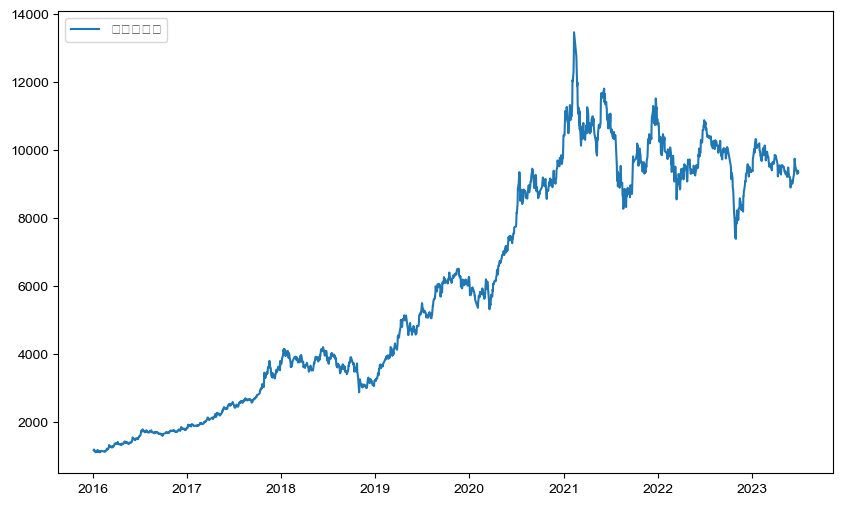

In [46]:
#一般来讲，获取的数起很少会出现超标异常，但不排除特煤情况，所以数据量不大的情况下可以先可视化看看收盘价走势
# 可视化看看数据走势
plt.figure(figsize= (10, 6))
plt.plot(stock_600519.index, stock_600519["收盘"].values, label='服价進势國')
plt.legend(loc= "upper left")

由于段票存在配股、分折、合井和发放股息等事件，会号致股价出现较大的变化。若不注意这一点就处理数据、计算各种指标，將会导致它们失去连续性，计算收益也会出现错误， 所以为了保证数据连费性，常通过前复权或后复权对价格序列进行调整。

## 前复权

保持当前价格不变，将历史价路进行增城，从而使股价连续。前复权用来看我非常方便，馆一眼新出股价的历史走势，整加各种技术指标也比较顺新，是各种行情软件默认的复权方式。

缺点一：会导致在不同时点看到的历史前复权价可能出现差异。

缺点二：对于有持续分红的公司来说，前复权价可能出现货值。

## 后复权

后复权：保证历史价格不变，在每次股票权益事件发生后，调整当前的股票价格。

后复权价格和真实股票价格可能差别较大，不适合用来看盘。

优点在于可以被看作投资者的长期财富增长曲线，反应投资者的真实收益率情况。

In [47]:
def get_stock_data (code: str, start_date: str, end_date:str, period: str, adjust: str):
    '''
    symbol: str = "000001",
    period: str = "daily",'weekly' 'monthly'
    start_date: str = "19700101",
    end_date: str = "20500101",
    adjust: str = [qfq','hfq'],
    '''
    #获取数据
    stock_ = ak.stock_zh_a_hist(
        symbol=code,
        period=period,
        tart_date=start_date,
        end_date=end_date,
        adjust=adjust)
    return stock_

## 常见的量化投资策略

* 选股策略
* 择时策略
* 套利策略
* 事件驱动策略

In [48]:
stock_600519["收盘"]

日期
2016-01-04    1164.79
2016-01-05    1178.86
2016-01-06    1175.65
2016-01-07    1125.65
2016-01-08    1137.71
               ...   
2023-06-26    9291.78
2023-06-27    9302.09
2023-06-28    9389.17
2023-06-29    9315.45
2023-06-30    9331.54
Name: 收盘, Length: 1821, dtype: float64

In [52]:
#处理量化交易信号
#第一步：计算我们需要的ma均线数据
#ma均线计算方式为N的算数平均值，这里我们假设策路染数是5日与20均线
stock_600519['ma5'] =stock_600519["收盘"].rolling(5).mean()
stock_600519['ma20'] =stock_600519["收盘"].rolling(20).mean()